In [3]:
import pandas as pd
# 读入数据
data = pd.read_csv('train.csv')  # 假设数据文件存在当前目录下

In [4]:
data.info()   #显示数据信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.describe()  #对数据进行统计分析，显示数量 均值 标准差 最小值 下四分位数 中位数 上四分位数 最大值

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


1    233
0     81
Name: Survived, dtype: int64
    男性   女性
0  468   81
1  109  233


Text(0, 0.5, '人数')

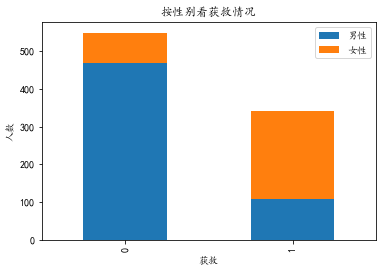

In [6]:
import matplotlib.pyplot as plt

#jupyter中专用的，用于显示图像
%matplotlib inline    

#以下两句用于正常显示汉字
#from pylab import mpl   
#mpl.rcParams['font.sans-serif'] = ['Kaiti']

#分别找出男性和女性中Survived为0、1的人数
Survived_m = data.Survived[data.Sex == 'male'].value_counts()  #value_counts()是一种查看表格某列中有多少个不同值的快捷方法，并计算每个不同值在该列中有多少重复值。
Survived_f = data.Survived[data.Sex == 'female'].value_counts()
print(Survived_f )
df = pd.DataFrame({u'男性':Survived_m, u'女性':Survived_f}) #以字典类型组建数据帧，列标题为男性和女性
print(df)

df.plot(kind = 'bar', stacked = True) #stacked表示柱状图是并排显示还是堆叠显示
plt.title(u'按性别看获救情况') 
plt.xlabel(u'获救')
plt.ylabel(u'人数')

#根据图中可以看出男性和女性的获救和死亡的比例明显不同，说明性别对目标值有影响，应将其作为特征值用于目标值的判断

    获救  未获救
S  217  427
C   93   75
Q   30   47


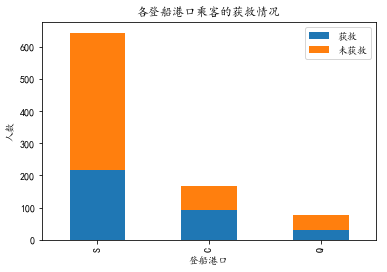

In [65]:
#这里换了一个角度研究特征值和目标值的关系，看不同登船港口的人中获救和未获救的人数
Survived_0 = data.Embarked[data.Survived == 0].value_counts()
Survived_1 = data.Embarked[data.Survived == 1].value_counts()

df = pd.DataFrame({u'获救':Survived_1,u'未获救':Survived_0})
print(df)
df.plot(kind = 'bar', stacked = True)
plt.title(u'各登船港口乘客的获救情况')
plt.xlabel(u'登船港口')
plt.ylabel(u'人数')
plt.show()

#从结果可见，从不同的港口登船的人的获救和未获救的比例明显不同，因此可以得出登船港口和目标值相关

In [66]:
#print(data.head())
# 删除姓名、ID、船票（票号）、客舱（客舱号）等无关信息，axis=0 删除行，=1 删除列
data.drop(['Name','PassengerId','Ticket','Cabin'], axis=1, inplace=True)
# 用平均值或众数填充缺失数据
#print(data.head())
data['Age'] = data['Age'].fillna(data['Age'].mean())   #data['Age'].mean()表示Age的平均数，fillna()表示填充空值的格，data['Age']表示data中的Age列


In [67]:
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())  #均值填充

data_Em = data['Embarked'].value_counts()   #data['Embarked'].value_counts(),用于表格Embraked列中有多少个不同值，并计算每个不同值在该列中有多少重复值，其按照重复值从多到少的顺序排列
print(data_Em)
data['Embarked'].value_counts().index[0]
#index[0]对应于重复值最多的那个数值的索引值（登船地点），即 众数。
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].value_counts().index[0])#用众数填充空值

# 将性别与登船港口进行独热编码，因为sex和Embarked中的值均为字符串，无法进行公式的计算，因此需要将其转化为数值，独热编码是一种方式，将特征量分解成
#含有其数值的多个特征量，值为0、1，如sex特征可以分解为Sex_male,Sex_female两个特征量，其值分别为0，1,由于Sex_male,Sex_female两个特征量是完全相关的
#只要有一列，两外一列不增加任何信息，因此可以将其中一列丢掉，一般是用参数“drop_first=True”丢掉第一列，
dumm = pd.get_dummies(data[['Sex','Embarked']], drop_first=True)
print(dumm.head())

S    644
C    168
Q     77
Name: Embarked, dtype: int64
   Sex_male  Embarked_Q  Embarked_S
0         1           0           1
1         0           0           0
2         0           0           1
3         0           0           1
4         1           0           1


In [68]:
data = pd.concat([data, dumm], axis=1)#按列融合数据，将Sex_male  Embarked_Q  Embarked_S列添加到原数据中
print(data.head())
data.drop(['Sex','Embarked'], axis=1, inplace=True)   #删除'Sex','Embarked'列

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  Sex_male  \
0         0       3    male  22.0      1      0   7.2500        S         1   
1         1       1  female  38.0      1      0  71.2833        C         0   
2         1       3  female  26.0      0      0   7.9250        S         0   
3         1       1  female  35.0      1      0  53.1000        S         0   
4         0       3    male  35.0      0      0   8.0500        S         1   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1  


In [69]:
# 数据缩放（归一化）
data['Age']=(data['Age']-data['Age'].min())/(data['Age'].max()-data['Age'].min())
data['Fare']=(data['Fare']-data['Fare'].min())/( data['Fare'].max()-data['Fare'].min())
print(data.head())


   Survived  Pclass       Age  SibSp  Parch      Fare  Sex_male  Embarked_Q  \
0         0       3  0.271174      1      0  0.014151         1           0   
1         1       1  0.472229      1      0  0.139136         0           0   
2         1       3  0.321438      0      0  0.015469         0           0   
3         1       1  0.434531      1      0  0.103644         0           0   
4         0       3  0.434531      0      0  0.015713         1           0   

   Embarked_S  
0           1  
1           0  
2           1  
3           1  
4           1  


In [70]:
from sklearn.model_selection import train_test_split

X = data.drop('Survived', axis=1)     #去掉目标值，作为训练的自变量
y = data.Survived                     #提取目标值
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)   #划分训练集和测试集

In [71]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(solver = 'liblinear') 
#有很多参数可选，下面为完整的参数，很多可以是默认的，几种重要的参数选择
#进一步的了解，请参考：https://www.cnblogs.com/volcao/p/9387838.html
#LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
#          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
#         penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
#          verbose=0, warm_start=False)
#solver : 字符串,取值 {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’},
#默认是 ‘liblinear’. 如果数据集比较小，则 ‘liblinear’是很好的选择；
#如果数据集很大，用‘sag’ and ‘saga’； 如果是多分类任务，则用 ‘newton-cg’, 
#‘sag’, ‘saga’ and ‘lbfgs’ ； ‘liblinear’ 只能用于二分类问题。 
#‘newton-cg’, ‘lbfgs’ and ‘sag’只处理 L2 范式的正则项，而 ‘liblinear’ and ‘saga’ 只处理 L1范式的正则项.


LR.fit(X_train, y_train)   #训练模型
y_test_pre = LR.predict(X_test)   #对测试集进行预测
print(y_test_pre)
print(y_test)
test = pd.concat([X_test,y_test], axis=1)    #这里将X_test和实际的目标值进行融合
test['y_test_pre'] = y_test_pre    #将预测结果也作为一列加上，可以通过数据查看，哪些样例预测对了，哪些预测错了
print(test)

print('训练集准确率：\n', LR.score(X_train, y_train))
print('验证集准确率：\n', LR.score(X_test, y_test))

[0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0
 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0
 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1
 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1
 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1
 0 0 0 0 0 0 1 0 1]
843    0
0      0
827    1
156    1
28     1
686    0
392    0
295    0
883    0
235    0
73     0
432    1
522    0
723    0
741    0
856    1
791    0
214    0
344    0
417    1
555    0
530    1
762    1
709    1
627    1
566    0
34     0
694    0
516    1
847    0
      ..
212    0
789    0
590    0
105    0
258    1
452    0
810    0
517    0
221    0
752    0
5      0
568    0
484    1
754    1
463    0
867    0
426    1
198    1
244    0
284  

solver : 字符串,取值 {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’},默认是 ‘liblinear’.
如果数据集比较小，则 ‘liblinear’是很好的选择； 如果数据集很大，用‘sag’ and ‘saga’；
如果是多分类任务，则用 ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ ； ‘liblinear’ 只能用于二分类问题。
‘newton-cg’, ‘lbfgs’ and ‘sag’只处理 L2 范式的正则项，而 ‘liblinear’ and ‘saga’ 只处理 L1范式的正则项.


In [45]:
from sklearn import metrics  #指标
print(metrics.confusion_matrix(y_test,y_test_pre))
print(metrics.classification_report(y_test,y_test_pre))

[[137  25]
 [ 26  80]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       162
           1       0.76      0.75      0.76       106

   micro avg       0.81      0.81      0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [14]:
print(metrics.precision_score(y_test,y_test_pre))
print(metrics.recall_score(y_test,y_test_pre))
print(metrics.f1_score(y_test,y_test_pre))
print(metrics.accuracy_score(y_test,y_test_pre))

0.7804878048780488
0.6956521739130435
0.7356321839080461
0.8283582089552238


In [16]:
#绘制ROC曲线
y_pred_prob = LR.predict_proba(X_test)
#输出预测每个样例属于正类的概率值
print(y_pred_prob)

[[0.81769093 0.18230907]
 [0.30816312 0.69183688]
 [0.5464195  0.4535805 ]
 [0.34499244 0.65500756]
 [0.51302908 0.48697092]
 [0.19490929 0.80509071]
 [0.86085491 0.13914509]
 [0.10396191 0.89603809]
 [0.66147754 0.33852246]
 [0.8592705  0.1407295 ]
 [0.79803127 0.20196873]
 [0.56744075 0.43255925]
 [0.35865449 0.64134551]
 [0.907433   0.092567  ]
 [0.70474249 0.29525751]
 [0.73233165 0.26766835]
 [0.81934501 0.18065499]
 [0.70759642 0.29240358]
 [0.88167653 0.11832347]
 [0.4875408  0.5124592 ]
 [0.80553666 0.19446334]
 [0.79814233 0.20185767]
 [0.5876867  0.4123133 ]
 [0.3677157  0.6322843 ]
 [0.5164013  0.4835987 ]
 [0.27138528 0.72861472]
 [0.81406676 0.18593324]
 [0.90742567 0.09257433]
 [0.56543926 0.43456074]
 [0.07799503 0.92200497]
 [0.85407128 0.14592872]
 [0.88506893 0.11493107]
 [0.60379164 0.39620836]
 [0.7070116  0.2929884 ]
 [0.29606424 0.70393576]
 [0.87137205 0.12862795]
 [0.86089533 0.13910467]
 [0.08856108 0.91143892]
 [0.85157481 0.14842519]
 [0.84425566 0.15574434]


In [17]:
#计算ROC曲线，即真正例率，假正例率，分类阈值等
fpr,tpr,thresholds = metrics.roc_curve(y_test,y_pred_prob[:,1])
print(fpr,tpr,thresholds)

[0.         0.         0.         0.00568182 0.00568182 0.01704545
 0.01704545 0.02272727 0.02272727 0.02840909 0.02840909 0.03977273
 0.03977273 0.04545455 0.04545455 0.05681818 0.05681818 0.08522727
 0.08522727 0.09090909 0.09090909 0.09659091 0.09659091 0.11363636
 0.11363636 0.11931818 0.11931818 0.14204545 0.14204545 0.15909091
 0.15909091 0.17045455 0.17045455 0.17613636 0.17613636 0.18181818
 0.18181818 0.19318182 0.19318182 0.21022727 0.21022727 0.22159091
 0.22159091 0.23295455 0.23295455 0.26136364 0.26136364 0.26704545
 0.26704545 0.28409091 0.29545455 0.30681818 0.30681818 0.34090909
 0.34659091 0.36363636 0.375      0.39772727 0.39772727 0.40340909
 0.43181818 0.5        0.5        0.50568182 0.50568182 0.51136364
 0.51136364 0.57386364 0.57386364 0.60227273 0.60227273 0.61363636
 0.61931818 0.63068182 0.64204545 0.65909091 0.72159091 0.74431818
 0.77840909 0.81818182 0.81818182 0.82386364 0.82386364 0.93181818
 0.93181818 0.98863636 1.        ] [0.         0.01086957 0.28

In [18]:
#计算AUC值
print(metrics.auc(fpr,tpr))

0.8692564229249011


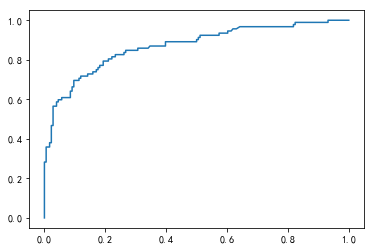

In [19]:
#绘制ROC曲线
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)